In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

The goal of the project is analyse and create a data story for exchange rate between Euro and US dollar.
We will show how the euro-dollar rate changed during the 2007-2008 financial crisis

In our project we will use the dataset that we downloaded from  https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020

It contains date and Euro change rate corresponding to Australian dollar, Bulgarian lev, Brazilian real, Canadian dollar, Swiss franc, Chinese yuan renminbi, Cypriot pound, Czech koruna, Danish krone, Estonian kroon, UK pound sterling, Greek drachma, Hong Kong dollar, Croatian kuna, Hungarian forint, Indonesian rupiah, Israeli shekel, Indian rupee, Iceland krona, Japanese yen, Korean won, Lithuanian litas, Latvian lats, Maltese lira, Mexican peso, Malaysian ringgit, Norwegian krone, New Zealand dollar, Philippine peso, Polish zloty, Romanian leu, Russian rouble, Swedish krona, Singapore dollar, Slovenian tolar, Slovak koruna, Thai baht, Turkish lira, US dollar, South African rand.

Some currency in the list doesn't exist anymore; it was replaced by the Euro €: Cypriot pound (2007), Estonian kroon (2011), Greek drachma (2002), Lithuanian litas (2015), Latvian lats (2014), Maltese lira (2008), Slovenian tolar (2007), Slovak koruna (2009).
 Bulgarian lev since 2002 is pegged to the Euro: 1 € = 1.9558 leva.

All data provided by European Central Bank Statistical Data WareHouse, EXR - Exchange Rates.
Dataset is versioned and stays on update.

for the date of providing this analysis the dataset contains the data sice 04 Jan 1999 untill 26 May 2023

In [2]:
exchange_rates = pd.read_csv('./EuroDailyHist/euro-daily-hist_1999_2022.csv')

Look at first 5 rows to understand the structure of dataset

In [3]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-05-26,1.6439,1.9558,5.3878,1.4630,0.9707,7.5874,NaN,23.648,7.4489,...,4.9572,NaN,11.5280,1.4520,NaN,NaN,37.2630,21.5340,1.0751,21.0148
1,2023-05-25,1.6443,1.9558,5.3320,1.4599,0.9708,7.5891,NaN,23.645,7.4502,...,4.9495,NaN,11.5490,1.4515,NaN,NaN,37.1540,21.3944,1.0735,20.7466
2,2023-05-24,1.6402,1.9558,5.3397,1.4600,0.9732,7.6005,NaN,23.671,7.4477,...,4.9614,NaN,11.5103,1.4526,NaN,NaN,37.1710,21.4487,1.0785,20.7479
3,2023-05-23,1.6282,1.9558,5.3649,1.4571,0.9718,7.6039,NaN,23.681,7.4475,...,4.9720,NaN,11.4494,1.4527,NaN,NaN,37.4350,21.3993,1.0779,20.7920
4,2023-05-22,1.6294,1.9558,5.4056,1.4618,0.9700,7.6067,NaN,23.676,7.4478,...,4.9737,NaN,11.3765,1.4554,NaN,NaN,37.2820,21.4629,1.0822,20.9137


In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6311 non-null   object 
 1   [Australian dollar ]      6311 non-null   object 
 2   [Bulgarian lev ]          5909 non-null   object 
 3   [Brazilian real ]         6043 non-null   object 
 4   [Canadian dollar ]        6311 non-null   object 
 5   [Swiss franc ]            6311 non-null   object 
 6   [Chinese yuan renminbi ]  6043 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6311 non-null   object 
 9   [Danish krone ]           6311 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6311 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6311 non-null   object 
 14  [Croatia

We see that dataset contains nullvalues, most of daily rate values are string, only some of them are numbers

First step is cleaning the data to give it a form more suitable for further analysis

As we need only US dollar column, we will concentrate our effort on it

Column 'Period\Unit:' we will rename to more appropriate - 'Time' and convert it to datetime datatype.
['US dollar '] - to 'US_Dollar'
it makes sence to sort the values of time in acsending order
remove index from 'Time' column

In [5]:
euro_to_dollar = exchange_rates[['Period\\Unit:','[US dollar ]']]

In [6]:
euro_to_dollar.rename(columns={'[US dollar ]' : 'US_Dollar', 'Period\\Unit:' : 'Time'}, inplace=True)
euro_to_dollar['Time'] = pd.to_datetime(euro_to_dollar['Time'])
euro_to_dollar.sort_values('Time', inplace=True)
euro_to_dollar.reset_index(inplace=True)

C:\Users\Yura\AppData\Local\Temp\ipykernel_8360\1197682829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euro_to_dollar.rename(columns={'[US dollar ]' : 'US_Dollar', 'Period\\Unit:' : 'Time'}, inplace=True)
C:\Users\Yura\AppData\Local\Temp\ipykernel_8360\1197682829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euro_to_dollar['Time'] = pd.to_datetime(euro_to_dollar['Time'])
C:\Users\Yura\AppData\Local\Temp\ipykernel_8360\1197682829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

In [7]:
euro_to_dollar.head()

,index,Time,US_Dollar
0,6310,1999-01-04,1.1789
1,6309,1999-01-05,1.1790
2,6308,1999-01-06,1.1743
3,6307,1999-01-07,1.1632
4,6306,1999-01-08,1.1659


In [8]:
euro_to_dollar['US_Dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1268     7
1.1305     7
          ..
1.4030     1
1.4113     1
1.4106     1
1.4127     1
1.0751     1
Name: US_Dollar, Length: 3734, dtype: int64

we see that some rows contain minus sign, lest look at them

In [9]:
minus_sign = euro_to_dollar['US_Dollar'].str.contains('-')
minus_sign_euro_to_dollar = euro_to_dollar[minus_sign]

In [10]:
minus_sign_euro_to_dollar['US_Dollar'].unique()

array(['-'], dtype=object)

In [11]:
minus_sign_euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 259 to 3476
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      62 non-null     int64         
 1   Time       62 non-null     datetime64[ns]
 2   US_Dollar  62 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.9+ KB


we have 62 missing values, logical decision will be just drop them

In [12]:
euro_to_dollar = euro_to_dollar[~minus_sign]

now convert to float

In [13]:
euro_to_dollar['US_Dollar'] = euro_to_dollar['US_Dollar'].astype(float)

Visualise the data

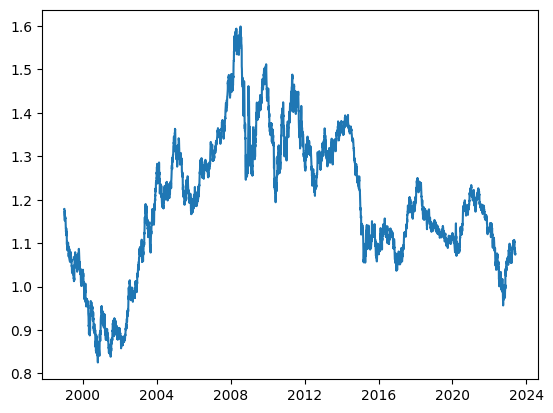

In [14]:
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_Dollar'])
plt.show()

the graphics shows daily floctuations and we can deduce upward and downward trends only in the long run(years)

Will be useful to see changes in the average value using average exchange rate for 30 days

In [15]:
euro_to_dollar['rolling_means']=euro_to_dollar['US_Dollar'].rolling(30).mean()

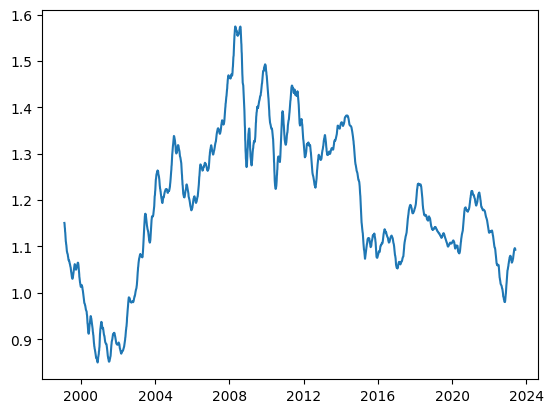

In [16]:
plt.plot(euro_to_dollar['Time'], euro_to_dollar['rolling_means'])
plt.show()

The picture is clearer

However our goal is create time-series for the whole period of existance of Euro. We want to create a data story to show how exchange rate was influenced by financial crisis in 2008

Good idea would be to sketch the future graph, we will use a graphic editor to do it. However ti could be done by using pen and paper.

Our audience will be familiar with notion of linear trend. We will use time period 2006-2010. Axes won't be
visible on our graph, we will use grid, axis ticks will be present for every second year and time period 
corresponding for the finansial crisis will be emphasized.

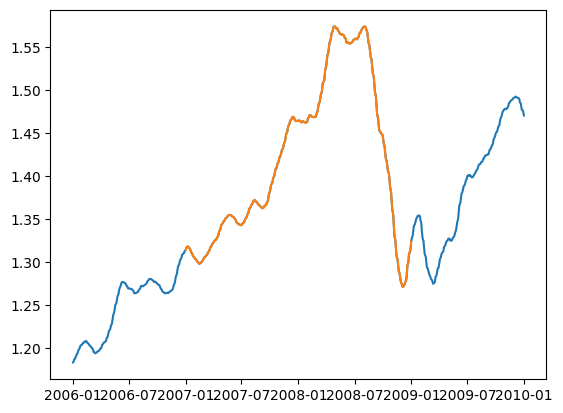

In [17]:
crisis_time_boolean = (euro_to_dollar['Time'].dt.year >= 2006) & (euro_to_dollar['Time'].dt.year < 2010)
crisis = euro_to_dollar.loc[crisis_time_boolean]
plt.plot(crisis['Time'], crisis['rolling_means'])
crisis_time_boolean = (euro_to_dollar['Time'].dt.year >= 2007) & (euro_to_dollar['Time'].dt.year <= 2008)
crisis_2007_2008 = euro_to_dollar.loc[crisis_time_boolean]
plt.plot(crisis_2007_2008['Time'], crisis_2007_2008['rolling_means'])
plt.show()

Style will be 'fivethirtyeight'. On 'x' axe will will use years

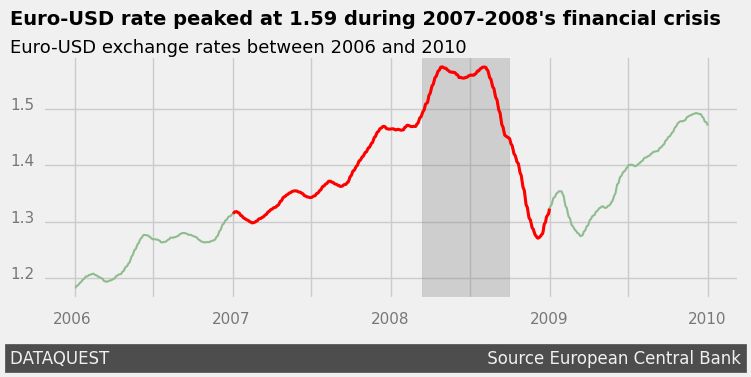

In [92]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8,3))
ax.set_xticklabels([])
xticks_labels = ['2006', '', '2007','', '2008', '', '2009','',  '2010']
x = 13100
for label in xticks_labels:
    ax.text(x, 1.12, label, alpha=0.5, fontsize=11)
    x += 183
ax.set_yticklabels([])
y = 1.2
x = 13000
ax.axvspan(xmin=13950, xmax=14150, alpha=0.3, color='grey')
rates = [1.2, 1.3, 1.4, 1.5]
for rate in rates:
    ax.text(x, y, rate, alpha=0.5, fontsize=11)
    y += 0.1
ax.tick_params(which = "minor", left = False)
ax.text(13000, 1.05,  'DATAQUEST' + '  '*36 + 'Source European Central Bank', 
        color = '#f0f0f0', backgroundcolor = '#4d4d4d', size=12)
ax.text(13000, 1.65, 'Euro-USD rate peaked at 1.59 during 2007-2008\'s financial crisis', weight='bold', size=14)
ax.text(13000, 1.60, 'Euro-USD exchange rates between 2006 and 2010', size=13)
ax.plot(crisis['Time'], crisis['rolling_means'], linewidth=1.5, color='darkseagreen')
ax.plot(crisis_2007_2008['Time'], crisis_2007_2008['rolling_means'], linewidth=2.2, color='red')